In [1]:
from rich import print

# Load Cases 🐃 🚚

## 1. Like working with different currencies 💱

Totals (or sub-totals) need to be collected for each load category separately.

In [45]:
D_2 = 25
L_2 = 30
S_2 = 15
W_2 = 10

D_1 = 25
L_1 = 60

D = D_1 + D_2
L = L_1 + L_2
S = S_2
W = W_2
print(f"{D=}, {L=}, {S=}, {W=}")

D=50, L=90, S=15, W=10

## 2. Factoring allows for conversion to "a common currency" 💶

In [46]:
fact = 1.25*D + 1.5*L + 1.0*S
print(f"{fact=}")

fact=212.5

## 3. Managing the many possible combinations of factored loads  🏋️‍♀‍💃🌨

### A. Separate functions 🙅

**Pros:**
* One function, one name
* Conceptually simple

**Cons:**
* Repetitive code
    * Difficult to maintain, buggy
* Inconsistent function signatures

In [47]:
def LC1(D: float) -> float:
    return 1.4 * D

def LC2(D: float, L: float) -> float:
    return 1.25 * D + 1.5 * L

def LC2a(D: float, L: float, S: float) -> float:
    return 1.25 * D + 1.5 * L + 1.0 * S

def LC2b(D: float, L: float, W: float) -> float:
    return 0.9 * D + 1.5 * L + 0.4 * W

def LC2c(D: float, L: float, W: float) -> float:
    return 1.25 * D + 1.5 * L + 0.4 * W
    

In [48]:
print(f"{D=}, {L=}, {S=}, {W=}")

fact_lc2b = LC2b(D=D, L=L, W=W)

print(f"{fact_lc2b=}")

D=50, L=90, S=15, W=10

fact_lc2b=184.0

## B. A generic function (with `dict`s) 👩‍💻

Pros: 
* One function to rule them all
* Factors can be stored in separate file
* Extensible
    * As long as you don't have any new load types

Cons: 
* Using the function "manually" can get tedious
* Tediousness can lead to data entry errors in use

In [49]:
def factor_loads(
    D_factor: float = 0,
    D: float = 0,
    L_factor: float = 0,
    L: float = 0,
    S_factor: float = 0,
    S: float = 0,
    W_factor: float = 0,
    W: float = 0,
    E_factor: float = 0,
    E: float = 0,
) -> float:
    """
    Returns the factored load for the given load factors
    and loads.
    """
    factored_load = (
        D_factor * D
        + L_factor * L
        + S_factor * S
        + W_factor * W
        + E_factor * E
    )
    return factored_load

In [50]:
fact_lc2a = factor_loads(
    D_factor=1.25, 
    D=D, 
    L_factor=1.5, 
    L=L
)

print(f"{D=}, {L=}, {S=}, {W=}")
print(f"{fact_lc2a=}")

D=50, L=90, S=15, W=10

fact_lc2a=197.5

In [54]:
combos = {
    "LC1": {
     "D_factor": 1.4
    },
     "LC2a": {
         "D_factor": 1.25,
         "L_factor": 1.5,
     },
      "LC2b": {
          "D_factor": 1.25,
          "L_factor": 1.5,
          "S_factor": 1.0,
      }
}

loads = {"D": 0.9, "L": 2.4, "S": 1.3}
combo = "LC1"

fact = factor_loads(**loads, **combos[combo])
print(f"{fact=}")

fact=1.26

## C. A Generic Function (with arrays)

Pros: 
* Fast, simple code
* Flexible for variable number of load types
    * As long as both vectors are the same length
* Extensible

Cons: 
* No "position labels"
* Can be brittle
    * If you update the number of load types, all inputs need to change

In [55]:
import numpy as np

LC1 = [1.4, 0, 0, 0, 0]
LC2 = [1.25, 1.5, 0, 0, 0]
LC2a = [1.25, 1.5, 1.0, 0, 0]
LC2b = [0.9, 1.5, 0, 0.4, 0]

load = [D, L, S, W, 0]

def factor_vec_load(load_vector: np.ndarray, factor_vector: np.ndarray) -> float:
    """
    Returns the loads in 'load_vector' factored by 'factor_vector'.
    Both arrays must be the same length.
    """
    # return sum(load_vector * factor_vector)
    return load_vector @ factor_vector

In [56]:
load = np.array(load)

fact_lc2 = factor_vec_load(
    np.array(load), 
    np.array(LC2)
)
fact_lc2a = factor_vec_load(
    np.array(load), 
    np.array(LC2a)
)

print(f"{load=}")
print(f"{fact_lc2=}")
print(f"{fact_lc2a=}")

load=array([50, 90, 15, 10,  0])

fact_lc2=197.5

fact_lc2a=212.5

## 4. Storing Load Combinations 📚

Choose one of two datatypes:

1. `dict`
2. `list` and `np.array`

### `dict`

**Pros:**
* Key, value pairs make it easy to understand the data, e.g. `{"D": 12.3, "L": 4.8}`
* Do not have to fill in loads that are `0.0`

**Cons:**
* No vector math available
    * Must loop to add/sub values

### `np.array`

**Pros:**
* Fast and simple vector math

**Cons:**
* No labels on data, e.g. `[12.3, 4.8, 0., 0., 0.]`
* Fixed length vectors require empty values, i.e. `0.0`

### Factor Dictionaries 📔

```json
{
    "LC1": {
        "DL_factor": 1.4
    },
    "LC2a": {
        "DL_factor": 1.25,
        "LL_factor": 1.5
    },
    "LC2b": {
        "DL_factor": 1.25,
        "LL_factor": 1.5,
        "SL_factor": 1.0
    },
    ...
}
```

In [58]:
import json

with open("NBCC_dict.json", 'r') as file:
    nbcc_dict = json.load(file)

print(nbcc_dict)

{
    'LC1': {'D_factor': 1.4},
    'LC2': {'D_factor': 1.25, 'L_factor': 1.5},
    'LC2a': {'D_factor': 0.9, 'L_factor': 1.5},
    'LC2b': {'D_factor': 1.25, 'L_factor': 1.5, 'S_factor': 1.0},
    'LC2c': {'D_factor': 1.25, 'L_factor': 1.5, 'W_factor': 1.0},
    'LC2d': {'D_factor': 0.9, 'L_factor': 1.5, 'W_factor': 0.4}
}

In [59]:
print(f'{factor_loads(D=2.4, L=0.9, S=3.6,**nbcc_dict["LC2a"])=}')

factor_loads(D=2.4, L=0.9, S=3.6,**nbcc_dict["LC2a"])=3.5100000000000002

### Vector dictionaries ➡➡➡➡➡

```json
{
    "LC1": [1.4, 0, 0, 0, 0],
    "LC2": [1.25, 1.5, 0, 0, 0],
    "LC2a": [0.9, 1.5, 0, 0, 0],
    "LC2b": [1.25, 1.5, 1.0, 0, 0],
    "LC2c": [1.25, 1.5, 0, 0.4, 0],
    "LC2d": [0.9, 1.5, 0.4, 0, 0],
}
```

In [60]:
with open('NBCC_vec.json', 'r') as json_file:
    nbcc_vec = json.load(json_file)
print(nbcc_vec)

{
    'LC1': [1.4, 0, 0, 0, 0],
    'LC2': [1.25, 1.5, 0, 0, 0],
    'LC2a': [0.9, 1.5, 0, 0, 0],
    'LC2b': [1.25, 1.5, 1.0, 0, 0],
    'LC2c': [1.25, 1.5, 0, 0.4, 0],
    'LC2d': [0.9, 1.5, 0.4, 0, 0],
    'LC3': [1.25, 0.0, 1.5, 0, 0]
}

In [61]:
print(f'{factor_vec_load(np.array([2.4, 0.9, 3.6, 0, 0]), np.array(nbcc_vec["LC2a"]))=}')

factor_vec_load(np.array([2.4, 0.9, 3.6, 0, 0]), np.array(nbcc_vec["LC2a"]))=3.5100000000000002

## A third way! `typing.NamedTuple`

Using `typing.NamedTuple` we can define a datatype that is both `dict`-ish and `array`-ish.

* The NamedTuple has named fields (`dict`-like)
* The named fields accept default values(`dict`-like)
    * We can skip empty `0.0` values
* The NamedTuple is `tuple`-like and can be converted directly to a `np.array`
* The NamedTuple can also import values from a JSON file

In [62]:
from typing import NamedTuple, Any

class Load(NamedTuple):
    """
    A class to describe loads according to the Canadian National
    Building Code (NBCC).
    
    The loads themselves can be of any type as long as they play
    well with either scalar arithmetic operators or numpy array
    operators.
    
    If array values are used, all arrays should be the same length.
    """
    D: Any = 0.0
    L: Any = 0.0
    S: Any = 0.0
    W: Any = 0.0
    E: Any = 0.0

In [63]:
## Examples

L0 = Load() # An empty load
L1 = Load(D=2.3, L=2.4, S=0.9) # Not all fields need be entered
L2 = Load( # A load with array values
    D=np.array([0.6, 1.1, 0.4]), 
    L=np.array([2.4, 3.6, 0.8]),
    S=np.array([0.5, 1.2, 3.6]),
    W=np.zeros(3),
    E=np.zeros(3),
)

In [64]:
print(f"{L0=}")
print(f"{L1=}")
print(f"{L2=}")

L0=Load(D=0.0, L=0.0, S=0.0, W=0.0, E=0.0)

L1=Load(D=2.3, L=2.4, S=0.9, W=0.0, E=0.0)

L2=Load(D=array([0.6, 1.1, 0.4]), L=array([2.4, 3.6, 0.8]), S=array([0.5, 1.2, 3.6]), W=array([0., 0., 0.]), 
E=array([0., 0., 0.]))

## NamedTuple as `dict` and as vector

In [65]:
factor_loads(**L2._asdict(), **nbcc_dict["LC2"])

array([4.35 , 6.775, 1.7  ])

In [66]:
factor_vec_load(np.array(L2).T, np.array(nbcc_vec["LC2"]))

array([4.35 , 6.775, 1.7  ])

## 5. Load Aliases 🕵️‍♀️

> Sometimes it can be nice to describe what the load is called instead of just "dead load". To use in calculations, we need to have an alias look-up., e.g. "Asphalt topping" `->` "DL"

### Example

Loads on a building might include:

* Member self-weight ("SW")
* Super-imposed dead load ("SDL")
* We may want to use specific names for specific loads
    * e.g. "Planter soil" instead of just "live load" even though it is a live load.

```python
load_categories_lookup = {
    "SW": "DL",
    "SDL": "DL",
    "Planter Soil": "LL",
    "Snow": "SL", 
    "Rain": "SL"
}
```

In [67]:
def alias_to_service_loads(alias_loads: dict, alias_lookup: dict) -> Load:
    """
    Returns a dictionary of service loads (i.e. loads conforming to the
    code categories of DL, LL, SL, etc.) obtained from the given loads
    in 'alias_loads' correlated against the load types in 'alias_lookup'.
    
    If the load type in 'alias_loads' is not listed in 'alias_lookup', no 
    transformation takes place.
    """
    service_loads = {}
    for load_name, load_mag in alias_loads.items():
        load_type = alias_lookup.get(load_name, load_name)
        
        if load_type in service_loads:
            service_loads[load_type] = service_loads[load_type] + load_mag
        else:
            service_loads.update({load_type: load_mag})
            
    return Load(**service_loads)

In [68]:
alias_lookup = {
    "SW": "D",
    "SDL": "D",
    "Planter Soil": "L",
    "Snow": "S", 
    "Rain": "S"
}

loads = {"SW": 14, "SDL": 30, "Planter Soil": 180, "Snow": 30, "Rain": 2}

service_loads = alias_to_service_loads(
    alias_loads=loads, 
    alias_lookup=alias_lookup)

In [69]:
print(f"{loads=}")
print(f"{service_loads=}")

loads={'SW': 14, 'SDL': 30, 'Planter Soil': 180, 'Snow': 30, 'Rain': 2}

service_loads=Load(D=44, L=180, S=32, W=0.0, E=0.0)

## 6. Find maximum and minimum factored loads

**Two approaches:**
1. Return just the max/min load
2. Return the max/min load AND which load case produced it (traceability)

**Additionally!**

It would be good if our "max" and "min" functions could take either _scalar_ or _array_ input.

**We need a Numpy function for this.**

### Why Numpy?

* If we want element-wise maximum between arrays, we cannot use (`<`, `>`, etc.)
* Need to use `np.maximum`
* `np.maximum` works on both scalar and array inputs!

### 1. Return Max/Min Loads

In [70]:
def factored_max(load: Load, load_combinations: dict) -> Any:
    """
    Returns a value representing the maximum factored load of 'load' calculated
    from all of the load combinations in 'load_combinations'.
    
    If 'load' contains scalar values, the maximum factored load is a scalar maximum.
    If 'load' contains array values, the maximum factored load is the envelope of
    maximum values across the input arrays in 'load'.
    """
    fl = float('-inf') # acc
    for load_combination, load_factors in load_combinations.items():
        current_fl = factor_vec_load(
            np.array(load).T, 
            np.array(load_factors)
        )
        fl = np.maximum(current_fl, fl)
    return fl

In [71]:
def factored_min(load: Load, load_combinations: dict) -> Any:
    """
    Returns a value representing the minimum factored load of 'load' calculated
    from all of the load combinations in 'load_combinations'.
    
    If 'load' contains scalar values, the minimum factored load is a scalar minimum.
    If 'load' contains array values, the minimum factored load is the envelope of
    minimum values across the input arrays in 'load'.
    """
    fl = float('inf') # acc
    for load_combination, load_factors in load_combinations.items():
        current_fl = factor_vec_load(
            np.array(load).T, 
            np.array(load_factors)
        )
        fl = np.minimum(current_fl, fl)
    return fl

In [76]:
print(L2)

Load(
    D=array([0.6, 1.1, 0.4]),
    L=array([2.4, 3.6, 0.8]),
    S=array([0.5, 1.2, 3.6]),
    W=array([0., 0., 0.]),
    E=array([0., 0., 0.])
)

In [74]:
nbcc_vec

{'LC1': [1.4, 0, 0, 0, 0],
 'LC2': [1.25, 1.5, 0, 0, 0],
 'LC2a': [0.9, 1.5, 0, 0, 0],
 'LC2b': [1.25, 1.5, 1.0, 0, 0],
 'LC2c': [1.25, 1.5, 0, 0.4, 0],
 'LC2d': [0.9, 1.5, 0.4, 0, 0],
 'LC3': [1.25, 0.0, 1.5, 0, 0]}

In [72]:
max_factored = factored_max(L2, nbcc_vec)
print(f"{max_factored=}")

min_factored = factored_min(L2, nbcc_vec)
print(f"{min_factored=}")

max_factored=array([4.85 , 7.975, 5.9  ])

min_factored=array([0.84, 1.54, 0.56])

## 2. Return Max/Min governing combination

**Two steps:**

1. Build a vector/matrix of the load combinations
2. Get the index of each extrema

In [77]:
def get_factored_matrix(load: Load, load_combinations: dict) -> np.ndarray:
    """
    Returns either a 1D or 2D array representing the loads in 'load' being
    factored by 'load_combinations'. Each factored load combination is a
    row in the resulting matrix.
    
    If the values in 'load' are scalars, then a 1D matrix is returned
    If the values in 'load' are 1D arrays, then a 2D matrix is returned
    """
    acc = None
    for idx, (load_combination, load_factors) in enumerate(
        load_combinations.items()
    ):
        current_fact = factor_vec_load(
            np.array(load).T, np.array(load_factors)
        )
        if idx == 0: acc = np.array([current_fact])
        else: acc = np.concatenate([acc, [current_fact]])
    return acc

In [78]:
def factored_max_trace(load: Load, load_combinations: dict) -> Any:
    """
    Returns a value representing the maximum factored load of 'load' calculated
    from all of the load combinations in 'load_combinations'.
    
    If 'load' contains scalar values, the maximum factored load is a scalar maximum.
    If 'load' contains array values, the maximum factored load is the envelope of
    maximum values across the input arrays in 'load'.
    """
    factored_matrix = get_factored_matrix(load, load_combinations)
    max_trace = np.argmax(factored_matrix, axis=0)
    return max_trace

In [79]:
def factored_min_trace(load: Load, load_combinations: dict) -> Any:
    """
    Returns a value representing the minimum factored load of 'load' calculated
    from all of the load combinations in 'load_combinations'.
    
    If 'load' contains scalar values, the minimum factored load is a scalar minimum.
    If 'load' contains array values, the minimum factored load is the envelope of
    minimum values across the input arrays in 'load'.
    """
    factored_matrix = get_factored_matrix(load, load_combinations)
    min_trace = np.argmin(factored_matrix, axis=0)
    return min_trace

In [83]:
nbcc_vec

{'LC1': [1.4, 0, 0, 0, 0],
 'LC2': [1.25, 1.5, 0, 0, 0],
 'LC2a': [0.9, 1.5, 0, 0, 0],
 'LC2b': [1.25, 1.5, 1.0, 0, 0],
 'LC2c': [1.25, 1.5, 0, 0.4, 0],
 'LC2d': [0.9, 1.5, 0.4, 0, 0],
 'LC3': [1.25, 0.0, 1.5, 0, 0]}

In [82]:
factored_matrix = get_factored_matrix(L2, nbcc_vec)
print(factored_matrix)

[[0.84  1.54  0.56 ]
 [4.35  6.775 1.7  ]
 [4.14  6.39  1.56 ]
 [4.85  7.975 5.3  ]
 [4.35  6.775 1.7  ]
 [4.34  6.87  3.   ]
 [1.5   3.175 5.9  ]]

In [80]:
print(f"{factored_max_trace(L2, nbcc_vec)=}")
print(f"{factored_min_trace(L2, nbcc_vec)=}")

factored_max_trace(L2, nbcc_vec)=array([3, 3, 6], dtype=int64)

factored_min_trace(L2, nbcc_vec)=array([0, 0, 0], dtype=int64)

## 7. Occupancies 🏠 🏢 🏥

> In buildings, loads can often be grouped together in different occupancies.
>
> `dict`s can be useful for organizing these.

### A. Occupancy dictionaries 📔

In [84]:
occupancies_dict = {
    "Residential": {
        "SW": 1.3,
        "SDL": 1.1,
        "L": 2.4,
    },
    "Residential Roof": {
        "SW": 0.6,
        "SDL": 0.3,
        "Snow": 1.1,
        "Rain": 0.2,
    },
    "Residential Amenity Roof": {
        "SW": 1.4,
        "SDL": 1.0,
        "Planter Soil": 3.6,
        "L": 4.8,
    },
    "Rooftop Mech": {
         "D": 1.83,
     },
}

In [89]:
occupancy = "Residential Roof"

service_loads = alias_to_service_loads(
    occupancies_dict[occupancy],
    alias_lookup
)
print(f"{occupancy=}")
print(f"{service_loads=}")
factored = factored_max(
    service_loads,
    nbcc_vec
)
max_trace = factored_max_trace(
    service_loads,
    nbcc_vec
)

print(f"{max_trace=}")
print(f"{factored=}")

occupancy='Residential Roof'

service_loads=Load(D=0.8999999999999999, L=0.0, S=1.3, W=0.0, E=0.0)

max_trace=6

factored=3.075

### B. Occupancy vectors ➡➡➡➡➡

> If you are wanting to use vectors for occupancies, it is easiest to use have your vectors already as _service loads_.

In [108]:
# 
occupancies_vec = {
    "Residential": np.array([2.4, 2.4, 0, 0, 0]),
    "Residential Roof": np.array([0.9, 0, 1.3, 0, 0]),
    "Residential Amenity Roof": np.array([2.6, 4.8, 0, 0, 0]),
    "Rooftop Mech": np.array([1.83, 0, 0, 0, 0]),
}

# Practical Example 🔨

Simply supported beam with one UDL and one point load.

Analysis engine: `pycba`, by Colin Caprani (https://ccaprani.github.io/pycba/)

In [109]:
import pycba as cba

with open('NBCC_vec_full.json', 'r') as file:
    nbcc_full = json.load(file)

# For a simply supported beam with a UDL and point load
# point load is at a distance 'a' from the left of the beam

r = [-1, 0, -1, 0] # Two nodes, vertical restraints
L = 6.9 # m
w = Load(90., 240., 0., -100., 0.) # kN/m
p = Load(220, 0., 130., 0., 0.) # kN/m
a = 4.7 # m
EI = 1 # Not required for moments and shear

In [110]:
beam_results = {}

for load_type in w._fields: # load_type = D, L, S, etc.
    w_span = [1, 1, getattr(w, load_type), 0, 0]
    pl_span = [1, 2, getattr(p, load_type), a, 0]
    load_matrix = [w_span, pl_span]
    
    beam = cba.BeamAnalysis([L], [EI], r, load_matrix)
    beam.analyze()
    beam_results.update({load_type: beam.beam_results})
    
print(beam_results)

{
    'D': <pycba.results.BeamResults object at 0x00000222B87B07F0>,
    'L': <pycba.results.BeamResults object at 0x00000222B86E79A0>,
    'S': <pycba.results.BeamResults object at 0x00000222B86FB0A0>,
    'W': <pycba.results.BeamResults object at 0x00000222B87B3580>,
    'E': <pycba.results.BeamResults object at 0x00000222B87B2FB0>
}

### Post-process results

In [111]:
r0_results = Load(*[
    [beam_results["D"].R[0]],
    [beam_results['L'].R[0]],
    [beam_results['S'].R[0]],
    [beam_results['W'].R[0]],
    [beam_results['E'].R[0]],
])

In [112]:
r1_results = Load(*[
    [beam_results["D"].R[1]],
    [beam_results['L'].R[1]],
    [beam_results['S'].R[1]],
    [beam_results['W'].R[1]],
    [beam_results['E'].R[1]],
])

In [113]:
moment_results = Load(*[
    [beam_results["D"].results.M],
    [beam_results['L'].results.M],
    [beam_results['S'].results.M],
    [beam_results['W'].results.M],
    [beam_results['E'].results.M],
])

In [114]:
shear_results = Load(*[
    [beam_results["D"].results.V],
    [beam_results['L'].results.V],
    [beam_results['S'].results.V],
    [beam_results['W'].results.V],
    [beam_results['E'].results.V],
])

### Calculate factored loads

In [120]:
m_max = factored_max(np.array(moment_results), nbcc_full)
m_min = factored_min(np.array(moment_results), nbcc_full)

v_max = factored_max(np.array(shear_results), nbcc_full)
v_min = factored_min(np.array(shear_results), nbcc_full)

r0_max = factored_max(np.array(r0_results), nbcc_full)
r0_min = factored_min(np.array(r0_results), nbcc_full)

r1_max = factored_max(np.array(r1_results), nbcc_full)
r1_min = factored_min(np.array(r1_results), nbcc_full)

### Plot Force Diagrams

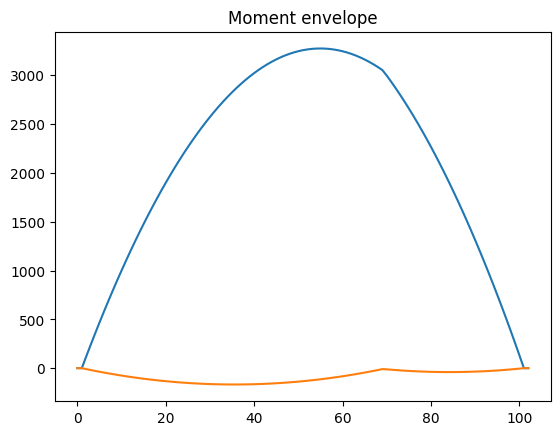

In [116]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title("Moment envelope")
ax.plot(m_max)
ax.plot(m_min)

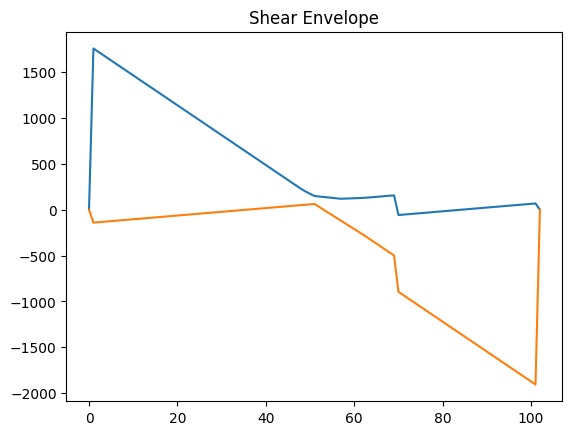

In [117]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title("Shear Envelope")
ax.plot(v_max)
ax.plot(v_min)